This script does the following. 
1) Decompresses images from the drive in the local machine disk for higher efficiency in the right folders.
2) It then reads the images with Keras module. 
3) Creates a very simple model with convolution in Keras. 
4) Ready to use for improvement with Keras.

Notes: The images that were 96x96 have been cropped to 36x36. 

You can look at :
https://www.youtube.com/watch?v=ArPaAX_PhIs&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF for a theoretical introduction.
https://www.youtube.com/watch?v=dZVkygnKh1M&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF&index=13 For some example of architectures. 
https://www.kaggle.com/fmarazzi/baseline-keras-cnn-roc-fast-10min-0-925-lb 
for an example with this data set. 
Transfer learning is easy with Keras! 
https://www.youtube.com/watch?v=FQM13HkEfBk&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF&index=20



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!tar -xf "drive/My Drive/Colab Notebooks/DataCancer/Pcam36/base_dir.tar" 
# Here you have to adapt this path to the location where you saved your data. 

In [0]:
!du -ms "/content/base_dir" #To check that it worked. 
#mkdir "base_dir/Architecture" #If you want to save the architecture.

510	/content/base_dir


## **Important notice**

To work properly this script has to be copied in /content/.

In [0]:
#!cp "drive/My Drive/Colab Notebooks/DataCancer/TrainConvolutionalModel-ReadDatafromGGdrive.ipynb" "/content/"

In [13]:
import pandas as pd 
import os
from glob import glob 
import numpy as np # linear algebra
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

#The following code will prepare to read the images. 

IMAGE_SIZE = 36
path0="base_dir/train/0/";path1="base_dir/train/1/"
df_train0 = pd.DataFrame({'path0': glob(os.path.join(path0,'*.png'))})
df_train1 = pd.DataFrame({'path1': glob(os.path.join(path0,'*.png'))})
num_train_samples = len(df_train0)+len(df_train1);print(len(df_train0),len(df_train1))
path0="base_dir/valid/0/";path1="base_dir/valid/1/"
df_val0 = pd.DataFrame({'path0': glob(os.path.join(path0,'*.png'))})
df_val1 = pd.DataFrame({'path1': glob(os.path.join(path0,'*.png'))})
num_val_samples = len(df_val0)+len(df_val1);print(len(df_val0),len(df_val1))

train_batch_size = 64
val_batch_size = 64

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

datagen = ImageDataGenerator(preprocessing_function=lambda x:(x - x.mean()) / x.std() if x.std() > 0 else x,
                            horizontal_flip=True,
                            vertical_flip=True)
#We read the images. 
train_path="base_dir/train"
train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        color_mode="rgb",
                                        batch_size=train_batch_size,
                                        class_mode='binary')
valid_path="base_dir/valid"
val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        color_mode="rgb",
                                        batch_size=val_batch_size,
                                        class_mode='binary')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        color_mode="rgb",
                                        batch_size=1,
                                        class_mode='binary',
                                        shuffle=False)

57600 57600
6400 6400
12800
Found 115200 images belonging to 2 classes.
Found 12800 images belonging to 2 classes.
Found 12800 images belonging to 2 classes.


In [14]:
print("num_val_samples=",num_val_samples) #This will be needed to print the results.

num_val_samples= 12800


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam,SGD

kernel_size = (2,2)
pool_size= (2,2)
first_filters = 8
ActivationFunction1="relu"
PaddingValue="same"
use_bias_var=False

model = Sequential()
model.add(Conv2D(first_filters, kernel_size, strides=(1,1), padding=PaddingValue, activation = ActivationFunction1, input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3), use_bias=use_bias_var))

model.add(MaxPool2D(pool_size = pool_size))
model.add(Flatten())
model.add(Dense(8, activation = 'relu', use_bias=False))
model.add(Dense(1, activation = "sigmoid",use_bias=False))#"softmax"))

# Compile the model
model.compile(SGD(), loss = "binary_crossentropy", metrics=["accuracy"])

model.summary() #Prints the model architecture. 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 36, 36, 8)         96        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2592)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 20736     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 8         
Total params: 20,840
Trainable params: 20,840
Non-trainable params: 0
_________________________________________________________________


In [18]:
from keras.callbacks import *


filedrive="drive/My Drive/Colab Notebooks/DataCancer/Pcam36/base_dir/Architecture/"
#Architecture has to be created before. 
filepath=filedrive+"epochs:{epoch:04d}-val_loss:{val_loss:.3f}.hdf5"          
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reducel = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.25)
""" 
#Code section to rerun with a previous architecture. 
#model.load_weights("/content/drive/My Drive/Colab Notebooks/DataCancer/Architecture/epochs:{epoch:03d}-val_loss:{val_loss:.3f}.hdf5".format(epoch=4,val_acc=0.650))
model.load_weights("/content/drive/My Drive/Colab Notebooks/DataCancer/Architecture/epochs:{epoch:03d}-val_loss:{val_loss:.3f}.hdf5".format(epoch=4,val_acc=0.650))
"""
#model.load_weights("/Architecture/epochs:{epoch:04d}-val_loss:{val_loss:.3f}.hdf5".format(epoch=3,val_loss=0.608))
history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=2,
                    callbacks=[checkpoint,reducel])
#                    callbacks=[checkpoint,reducel, earlystopper])

Epoch 1/2
1800/1800 [==============================] - 74s 41ms/step - loss: 0.6013 - accuracy: 0.6807 - val_loss: 0.5466 - val_accuracy: 0.7121

Epoch 00001: val_loss improved from -inf to 0.54661, saving model to drive/My Drive/Colab Notebooks/DataCancer/Pcam36/base_dir/Architecture/epochs:0001-val_loss:0.547.hdf5
Epoch 2/2
1800/1800 [==============================] - 72s 40ms/step - loss: 0.5602 - accuracy: 0.7200 - val_loss: 0.6274 - val_accuracy: 0.7297

Epoch 00002: val_loss improved from 0.54661 to 0.62741, saving model to drive/My Drive/Colab Notebooks/DataCancer/Pcam36/base_dir/Architecture/epochs:0002-val_loss:0.627.hdf5


['__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


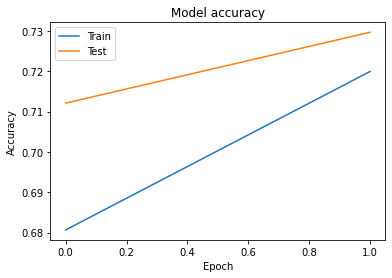

In [19]:
print(dir(history.history))
print(history)
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
# Not yet managed to run it. 
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# make a prediction
length_here=num_val_samples
y_pred_keras = model.predict_generator(test_gen, steps=length_here, verbose=1)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_gen.classes, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

12800/12800 [==============================] - 24s 2ms/step


0.7999565063476562

### PLOT ROC CURVE!

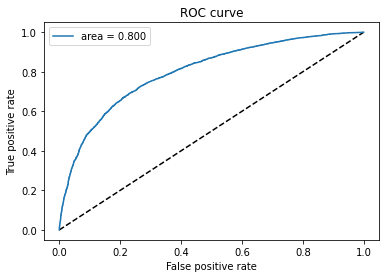

In [21]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()